In [ ]:
import re
import string
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [16]:
df_dataset1 = pd.read_csv('deceptive-opinion.csv')

In [17]:
df_dataset1.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [18]:
df_dataset1=df_dataset1.drop(["hotel","polarity","source"],axis=1)

In [19]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df_dataset1['deceptive']= label_encoder.fit_transform(df_dataset1['deceptive'])

In [20]:
df_dataset1.head()

,deceptive,text
0,1,We stayed for a one night getaway with family ...
1,1,Triple A rate with upgrade to view room was le...
2,1,This comes a little late as I'm finally catchi...
3,1,The Omni Chicago really delivers on all fronts...
4,1,I asked for a high floor away from the elevato...


In [39]:
df_dataset2 = pd.read_csv('fake reviews dataset.csv')

In [40]:
df_dataset2.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [41]:
df_dataset2 = df_dataset2.drop(["category","rating"], axis=1)
df_dataset2 = df_dataset2.sample(frac=1)

label_encoder = preprocessing.LabelEncoder()

df_dataset2['label']= label_encoder.fit_transform(df_dataset2['label'])
df_dataset2.head()

,label,text_
25259,1,Very cute story. Even though Harry is only the...
31754,0,It was very helpful to me. The author has a go...
3685,1,I love my Healthy Human bottle! I have one. My...
3924,0,"Did about a full week, it was still very comfo..."
31722,0,The author did a fabulous job of explaining th...


In [49]:
df_dataset2.columns = ['deceptive', 'text']
df = pd.concat([df_dataset1, df_dataset2], axis = 0)
df.groupby('deceptive').describe()

text                                                            \
           count unique                                                top   
deceptive                                                                    
0          21016  20997  My dog loves these and it has kept her occupie...   
1          21016  21011  Very disappointed in our stay in Chicago Monoc...   

                
          freq  
deceptive       
0            2  
1            2

In [54]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
def clean_text(text):

    ## Remove puncuation
    text = text.translate(string.punctuation)
    ## Convert words to lower case and split them
    text = text.lower().split()
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [word for word in text if not word in stops and len(word) >= 3]
    text = " ".join(text)

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [51]:
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…',
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─',
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞',
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def clean_char(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, f' {punct} ')
    return x

In [52]:
def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

In [55]:
df['text'] = df['text'].map(lambda a: clean_numbers(a))
df['text'] = df['text'].map(lambda a: clean_char(a))
df['text'] = df['text'].map(lambda a: clean_text(a))
df['text']

,text
0,stay one night getaway famili thursday tripl a...
1,tripl rate upgrad view room less also includ b...
2,come littl late final catch review past sever ...
3,omni chicago realli deliv front spacious room ...
4,ask high floor away elev got room pleasant dec...
...,...
28437,like new detect thought third book seri would ...
4292,product incomplet order ship time wife love ni...
15887,product need materi good larg collect
4205,take get use help longer ride


In [58]:
x = df['text']
y = df['deceptive']

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

In [85]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=5)
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(x_train.shape[0]))
print('Number of rows in the test set: {}'.format(x_test.shape[0]))

Number of rows in the total set: 42032
Number of rows in the training set: 31524
Number of rows in the test set: 10508


In [82]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

count_vector = CountVectorizer()
training_data = count_vector.fit_transform(x_train)
testing_data = count_vector.transform(x_test)
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

predictions = naive_bayes.predict(testing_data)

mnbaccuracy = accuracy_score(y_test, predictions)
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.8139512752188809
Precision score:  0.8596491228070176
Recall score:  0.7522744503411676
F1 score:  0.8023855251187708


In [66]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svc = SVC()
svc.fit(training_data, y_train)
svc_predictions = svc.predict(testing_data)

svcaccuracy = accuracy_score(y_test,svc_predictions)
print('Accuracy score: ', format(accuracy_score(y_test,svc_predictions)))
print('Precision score: ', format(precision_score(y_test,svc_predictions)))
print('Recall score: ', format(recall_score(y_test, svc_predictions)))
print('F1 score: ', format(f1_score(y_test, svc_predictions)))

Accuracy score:  0.8589645984012181
Precision score:  0.848585079015068
Recall score:  0.875284306292646
F1 score:  0.8617279343161037


In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(training_data, y_train)
knn_predictions = knn.predict(testing_data)

knnaccuracy = accuracy_score(knn_predictions,y_test )
print('Accuracy score: ', format(accuracy_score(knn_predictions,y_test )))
print('Precision score: ', format(precision_score(y_test,knn_predictions)))
print('Recall score: ', format(recall_score(y_test, knn_predictions)))
print('F1 score: ', format(f1_score(y_test, knn_predictions)))

Accuracy score:  0.6144842025123716
Precision score:  0.7643504531722054
Recall score:  0.3356709628506444
F1 score:  0.466482286316344


In [68]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()
training_data1 = training_data.toarray()
gnb.fit(training_data1, y_train)
testing_data1= testing_data.toarray()
gnb_predictions = gnb.predict(testing_data1)

gnb_accuracy = accuracy_score(gnb_predictions,y_test )
print('Accuracy score: ', format(accuracy_score(gnb_predictions,y_test )))
print('Precision score: ', format(precision_score(y_test,gnb_predictions)))
print('Recall score: ', format(recall_score(y_test, gnb_predictions)))
print('F1 score: ', format(f1_score(y_test, gnb_predictions)))

Accuracy score:  0.6896650171298059
Precision score:  0.8253148207943171
Recall score:  0.4844579226686884
F1 score:  0.6105338588319599


In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtree_model = DecisionTreeClassifier(max_depth = 2)
dtree_model.fit(training_data1, y_train)
dtree_predictions = dtree_model.predict(testing_data)

dtree_accuracy = accuracy_score(dtree_predictions,y_test )
print('Accuracy score: ', format(accuracy_score(dtree_predictions,y_test )))
print('Precision score: ', format(precision_score(y_test,dtree_predictions)))
print('Recall score: ', format(recall_score(y_test, dtree_predictions)))
print('F1 score: ', format(f1_score(y_test, dtree_predictions)))

Accuracy score:  0.5396840502474305
Precision score:  0.8884955752212389
Recall score:  0.09514783927217589
F1 score:  0.17188837527820577


In [70]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

sgd_clf = SGDClassifier()
sgd_clf.fit(training_data, y_train)
sgdpredicted = sgd_clf.predict(testing_data)

sgd_accuracy = accuracy_score(sgdpredicted,y_test )
print('Accuracy score: ', format(accuracy_score(sgdpredicted,y_test )))
print('Precision score: ', format(precision_score(y_test,sgdpredicted)))
print('Recall score: ', format(recall_score(y_test, sgdpredicted)))
print('F1 score: ', format(f1_score(y_test, sgdpredicted)))

Accuracy score:  0.8596307575180815
Precision score:  0.8616555661274976
Recall score:  0.8582259287338894
F1 score:  0.8599373278890894


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(training_data, y_train)
lrpredicted = lr.predict(testing_data)

lr_accuracy = accuracy_score(lrpredicted,y_test )
print('Accuracy score: ', format(accuracy_score(lrpredicted,y_test )))
print('Precision score: ', format(precision_score(y_test,lrpredicted)))
print('Recall score: ', format(recall_score(y_test, lrpredicted)))
print('F1 score: ', format(f1_score(y_test, lrpredicted)))

Accuracy score:  0.8602969166349448
Precision score:  0.8723113023073915
Recall score:  0.8455269143290371
F1 score:  0.8587102983638114


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(training_data, y_train)
kmeansPredicted = kmeans.predict(testing_data)

kmeans_accuracy = accuracy_score(kmeansPredicted,y_test )
print('Accuracy score: ', format(accuracy_score(kmeansPredicted,y_test )))

Accuracy score:  0.5026646364674534


In [96]:
print('Multinomial Naive Bayes:',mnbaccuracy)
print('Gausian Naive Bayes:',gnb_accuracy)
print('Decision tree:',dtree_accuracy)
print('Support Vector Classifier:',svcaccuracy)
print('K-Nearest Neighbour:',knnaccuracy)
print('Stochastic Gradient Descent:',sgd_accuracy)
print('LogisticRegression:',lr_accuracy)
print('KMeans:',kmeans_accuracy)

Multinomial Naive Bayes: 0.8139512752188809
Gausian Naive Bayes: 0.6896650171298059
Decision tree: 0.5396840502474305
Support Vector Classifier: 0.8589645984012181
K-Nearest Neighbour: 0.6144842025123716
Stochastic Gradient Descent: 0.8596307575180815
LogisticRegression: 0.8602969166349448
KMeans: 0.5026646364674534


AUC: 0.740


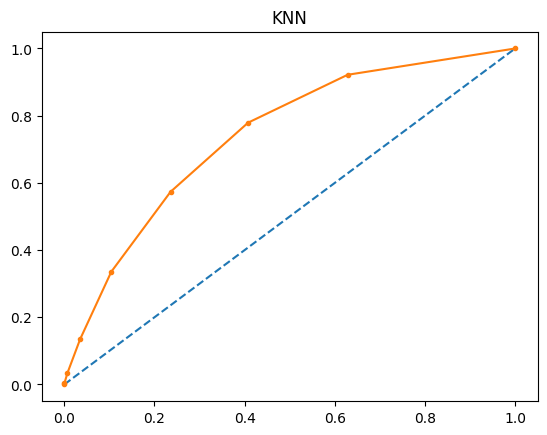

In [93]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

trainX, testX, trainy, testy = train_test_split(x, y, random_state=5)
training_data = count_vector.fit_transform(trainX)
testing_data = count_vector.transform(testX)

model = KNeighborsClassifier(n_neighbors=7)
model.fit(training_data, trainy)
probs = model.predict_proba(testing_data)

probs = probs[:, 1]
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(testy, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.title("KNN")
pyplot.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.937


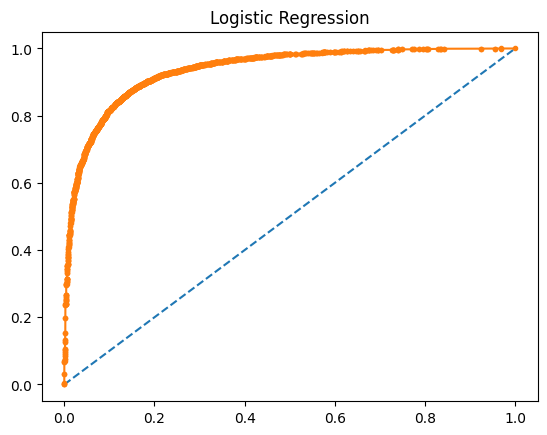

In [94]:
model = LogisticRegression()
model.fit(training_data, trainy)
probs = model.predict_proba(testing_data)

probs = probs[:, 1]
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(testy, probs)

pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.title("Logistic Regression")
pyplot.show()

AUC: 0.573


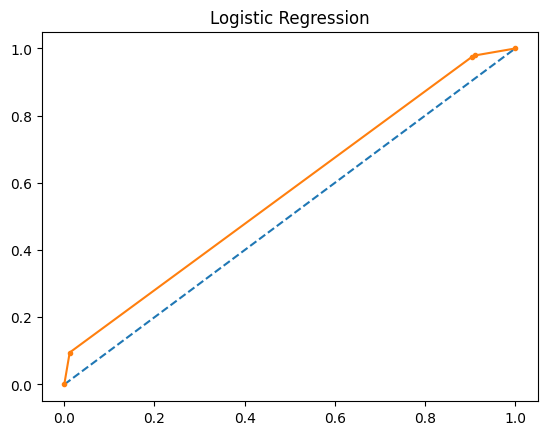

In [95]:
model = DecisionTreeClassifier(max_depth = 2)
model.fit(training_data, trainy)
probs = model.predict_proba(testing_data)

probs = probs[:, 1]
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(testy, probs)

pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.title("Logistic Regression")
pyplot.show()